# Introduction

Max imilian Haeussler suggested using scanpy to generate a cell browser before sending it to the UCSC single cell browser.

ah, so your matrix was misformatted, well, this browser I built for
you last night won't be very useful then, but run through our default
pipeline the inverted matrix looks like this:
https://hgwdev.gi.ucsc.edu/~max/cb/?ds=mouse-limb%2F10x

Maybe it's easier if you build a first version of the browser
yourself. Mistakes like a transposed matrix you would have very
quickly spotted by looking at the data in the browser...

To make this easier, Scanpy comes with a cell browser creation
function, it's called "cellbrowser()"
https://scanpy.readthedocs.io/en/stable/external/scanpy.external.exporting.cellbrowser.html#scanpy.external.exporting.cellbrowser

It will write your matrix and meta data into normal text files (easy
to grep, less, cat, cut, etc) and then convert these into a html
directory that you can open in your internet browser if copied to a
webserver (if you specify the -p option, you can even look at them on
your own laptop via http://localhost). I'm very interested in your
feedback, how easy this is to get to run. We have had 4-5 people now
build their own browsers, but it's always good to get more feedback.

In [1]:
import scanpy as scanpy
import pandas
import os
import numpy

In [2]:
ls monocle/

190714MouseLimb10Xraw.h5ad@  200315_C1_categorical.h5ad
200120_10x.h5ad              200315_C1.h5ad
200120_10x.loom              200319GeneID.csv
200120_C1.h5ad               cellbrowser_cluster.png
200120_C1.loom               mouse/


In [3]:
ls monocle/mouse/*.csv

monocle/mouse/barcodes-to-cluster.csv


In [4]:
barcodes_to_cluster = pandas.read_csv('monocle/mouse/barcodes-to-cluster.csv', index_col=0)
barcodes_to_cluster.head()

,orig.ident
limb12_13_0AAACCTGAGATCGATA_1,3
limb12_13_0AAACCTGAGATGAGAG_1,2
limb12_13_0AAACCTGAGCAGATCG_1,5
limb12_13_0AAACCTGAGCGATCCC_1,6
limb12_13_0AAACCTGAGTGTACCT_1,1


In [5]:
tenx_gene_ids = pandas.read_csv('monocle/200319GeneID.csv', index_col=0)
print(tenx_gene_ids.shape)
tenx_gene_ids.head()

(43346, 1)


,gene_ids-0
RP23-271O17.1,ENSMUSG00000102693.1
Gm26206,ENSMUSG00000064842.1
Xkr4,ENSMUSG00000051951.5
RP23-317L18.1,ENSMUSG00000102851.1
RP23-317L18.4,ENSMUSG00000103377.1


In [6]:
#adata = scanpy.read('monocle/190714MouseLimb10Xraw.h5ad')
tenx_h5ad_filename = 'monocle/200120_10x.h5ad'
adata = scanpy.read(os.path.expanduser(tenx_h5ad_filename))

In [7]:
if not os.path.exists('cellbrowser'):
    os.mkdir('cellbrowser')

In [8]:
len(adata.var_names)

43346

In [9]:
assert numpy.all(adata.var_names == tenx_gene_ids.index)

In [10]:
adata.var_names

Index(['RP23-271O17.1', 'Gm26206', 'Xkr4', 'RP23-317L18.1', 'RP23-317L18.4',
       'RP23-317L18.3', 'RP23-115I1.6', 'Gm1992', 'RP23-115I1.5',
       'RP23-115I1.2',
       ...
       'mt-Nd4', 'mt-Th', 'mt-Ts2', 'mt-Tl2', 'mt-Nd5', 'mt-Nd6', 'mt-Te',
       'mt-Cytb', 'mt-Tt', 'mt-Tp'],
      dtype='object', name='index', length=43346)

In [11]:
tenx_gene_ids['gene_ids-0'].values

array(['ENSMUSG00000102693.1', 'ENSMUSG00000064842.1',
       'ENSMUSG00000051951.5', ..., 'ENSMUSG00000064370.1',
       'ENSMUSG00000064371.1', 'ENSMUSG00000064372.1'], dtype=object)

In [12]:
if 'gene_id' not in adata.var_keys():
    print("adding gene_id")
    adata.var['gene_id'] = tenx_gene_ids['gene_ids-0']
    adata.write(tenx_h5ad_filename, compression=9)

In [13]:
adata.var_keys()

['gene_id']

In [14]:
adata.obs_names

Index(['limb12_13_0AAACCTGAGATCGATA_1', 'limb12_13_0AAACCTGAGATGAGAG_1',
       'limb12_13_0AAACCTGAGCAGATCG_1', 'limb12_13_0AAACCTGAGCGATCCC_1',
       'limb12_13_0AAACCTGAGTGTACCT_1', 'limb12_13_0AAACCTGAGTTGTAGA_1',
       'limb12_13_0AAACCTGCAAGTTAAG_1', 'limb12_13_0AAACCTGCAATCCGAT_1',
       'limb12_13_0AAACCTGCACAAGCCC_1', 'limb12_13_0AAACCTGCACGTAAGG_1',
       ...
       'limb8_15_0TTTGTCACAGCCTTTC_1', 'limb8_15_0TTTGTCACAGGCTCAC_1',
       'limb8_15_0TTTGTCACATATACGC_1', 'limb8_15_0TTTGTCAGTCCAGTAT_1',
       'limb8_15_0TTTGTCAGTCGAACAG_1', 'limb8_15_0TTTGTCAGTCGAGTTT_1',
       'limb8_15_0TTTGTCAGTTATTCTC_1', 'limb8_15_0TTTGTCAGTTCCGGCA_1',
       'limb8_15_0TTTGTCATCGTTGCCT_1', 'limb8_15_0TTTGTCATCTGTCTCG_1'],
      dtype='object', name='index', length=90637)

In [15]:
adata.obsm.keys()

KeysView(AxisArrays with keys: X_tsne, X_umap)

In [16]:
cell_type = dict(adata.obs['cell_type'])

In [17]:
adata.uns_keys()

['batch_colors',
 'cell_type_colors',
 'doublet_corrected_p_less_than_0_1_colors',
 'stage_colors']

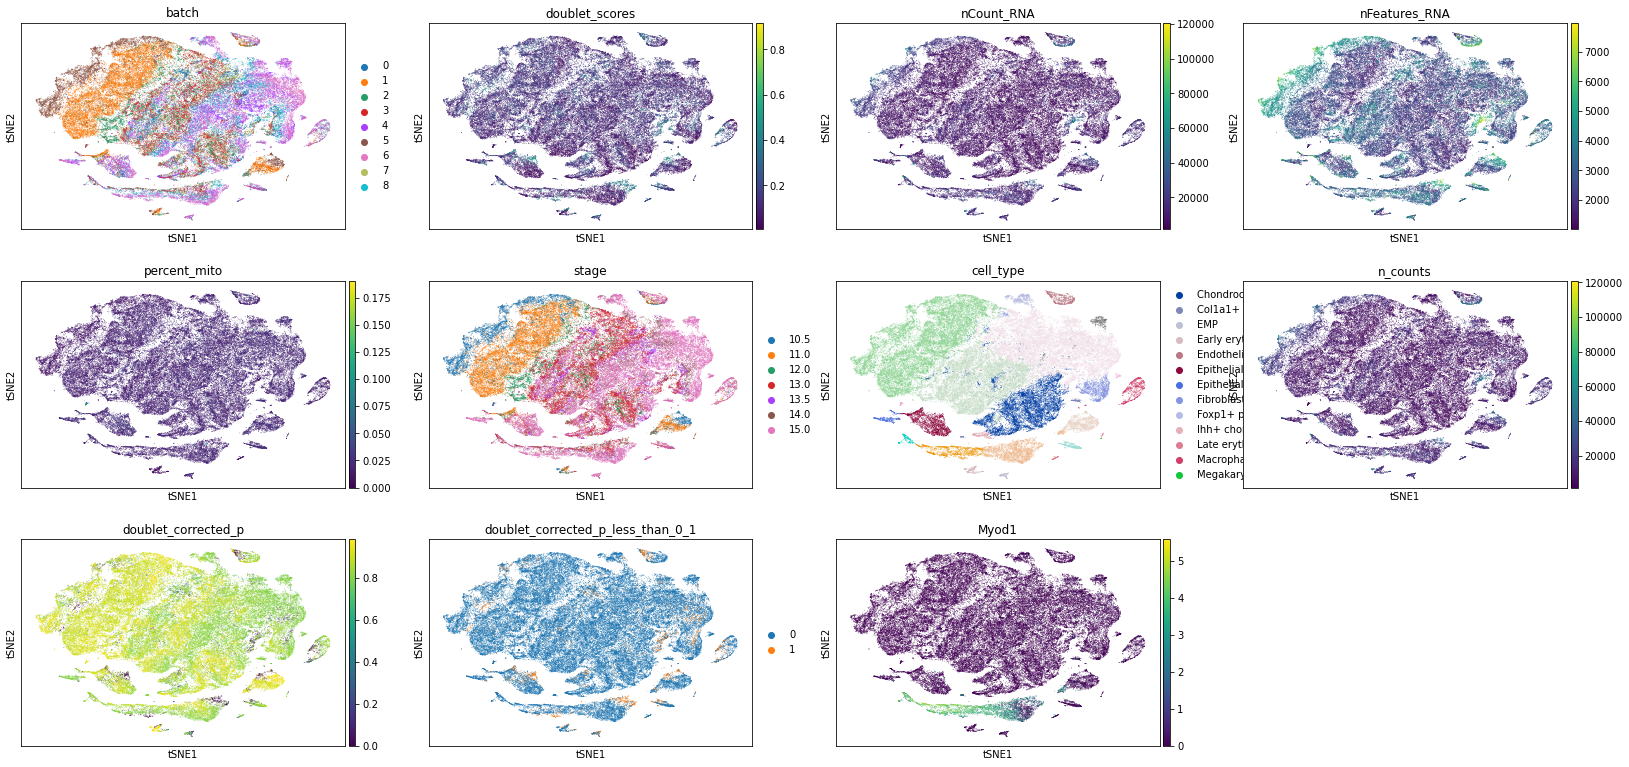

In [18]:
scanpy.pl.tsne(adata, color=['batch', 'doublet_scores', 'nCount_RNA', 'nFeatures_RNA', 
                            'percent_mito', 'stage', 'cell_type', 'n_counts', 'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1','Myod1'])

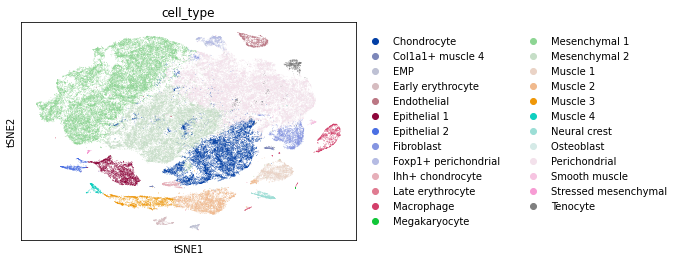

In [19]:
scanpy.pl.tsne(adata, color=['cell_type'])

#scanpy.external.exporting.cellbrowser(adata, data_dir, data_name, embedding_keys=None, annot_keys=('louvain', 'percent_mito', 'n_genes', 'n_counts'), cluster_field='louvain', nb_marker=50, skip_matrix=False, html_dir=None, port=None, do_debug=False)

In [20]:
tenx_project = 'cellbrowser/10x'
tenx_docroot = os.path.expanduser('~/public_html/cellbrowser/')
if not os.path.exists(tenx_project):
    os.mkdir(tenx_project)
if not os.path.exists(tenx_docroot):
    os.mkdir(tenx_docroot)

In [21]:
with open('cellbrowser/10x/desc.conf', 'wt') as outstream:
    outstream.write("""title = "High cell count 10x single cell RNA-seq mouse forelimb embryonic developmental time course."

# a thumbnail image of some nice image representing your dataset, sometimes it's figure 1, sometimes 
# the journal cover, or just a screenshot of the t-SNE plot. If the file is bigger than 400px,
# optimize the image size to something smaller that can load progressively with this Unix command:
# convert myImage.png -sampling-factor 4:2:0 -strip -quality 85 -interlace JPEG -colorspace sRGB -resize 400^ thumb.jpg

#image = "thumb.jpg"

# abstract of paper or dataset summary text
# abstract = "Please edit desc.conf to change this text or comment out the abstract= line and create abstract.html in the same directory as desc.conf"

# methods: please describe roughly what the samples are and how you processed them computationally
# methods = "Please edit desc.conf to change this text or comment out the methods= line and create methods.html in the same directory as desc.conf"

# All URLs can contain a optional description after a space
# URL to pre-print
#biorxiv = "https://www.biorxiv.org/content/123/123.full Strangelove et al."
# URL to paper fulltext
#paper_url = "http://www.nature.com/xxx Strangelove et al, Nature 2021"
# URL to some other dataset related website, e.g. the hosting lab's own viewer
#other_url= "http://university.edu/lab/dataset Our Lab Website"
# DOI
#doi="xxx"
#

# PMID
#pmid = "12343234 Strangelove et al"
# GEO Series accession, usually starts with GSE
#geo_series = "GSE25097"
# dbGaP accession, usually starts with phs.
#dbgap = "phs000424.v7.p2"
# arrayexpress accession
# arrayexpress = "xxx"
# ENA project accession
# ena_project = "ENAP12341"
# SRA accession
# sra_study = "xxxx"
# NBCI Bioproject acccession
#bioproject = "xxxx"
#
# You can add a file with the original raw data, if needed. It gets copied over and added to the Downloads tab, with a note
rawMatrixFile= "200120_10x.h5ad"
rawMatrixNote= "Scanpy compatible 10X matrix file"

submitter = "Diane Trout"
version = 200325
submission_date = "2019-04-22"
lab = "Barbara Wold"
institute = "California Institute of Technology"
body_part = "forlimb"
#
# Any other information you want to show on the dataset info page
#custom = {"sample barcode": "1231-HH11" }
#
""")


In [22]:
scanpy.external.exporting.cellbrowser(
    adata, 
    tenx_project, 
    '10x_limb',
    annot_keys=('cell_type', 'batch', 'doublet_scores', 'nCount_RNA', 
                'nFeatures_RNA', 'percent_mito', 'stage', 'n_counts', 
                'doublet_corrected_p', 'doublet_corrected_p_less_than_0_1'),
    cluster_field='cell_type',
    html_dir=tenx_docroot)

INFO:root:Writing scanpy matrix (90637 cells, 43346 genes) to cellbrowser/10x/exprMatrix.tsv.gz
INFO:root:Transposing matrix
INFO:root:Writing gene-by-gene, without using pandas
INFO:root:Writing 43346 genes in total
INFO:root:Wrote 0 genes
INFO:root:Wrote 2000 genes
INFO:root:Wrote 4000 genes
INFO:root:Wrote 6000 genes
INFO:root:Wrote 8000 genes
INFO:root:Wrote 10000 genes
INFO:root:Wrote 12000 genes
INFO:root:Wrote 14000 genes
INFO:root:Wrote 16000 genes
INFO:root:Wrote 18000 genes
INFO:root:Wrote 20000 genes
INFO:root:Wrote 22000 genes
INFO:root:Wrote 24000 genes
INFO:root:Wrote 26000 genes
INFO:root:Wrote 28000 genes
INFO:root:Wrote 30000 genes
INFO:root:Wrote 32000 genes
INFO:root:Wrote 34000 genes
INFO:root:Wrote 36000 genes
INFO:root:Wrote 38000 genes
INFO:root:Wrote 40000 genes
INFO:root:Wrote 42000 genes
INFO:root:Writing t-SNE coords to cellbrowser/10x/tsne_coords.tsv
INFO:root:Writing UMAP coords to cellbrowser/10x/umap_coords.tsv
INFO:root:Filtering for >5 cells then do sc.